Classification - Decision Tree

#External sources used.
•	http://scikit-learn.org/stable/modules/tree.html
•	https://www.datacamp.com/courses/machine-learning-with-tree-based-models-in-python
•	http://scikit-learn.org/stable/datasets/index.html#wine-dataset
•	http://mines.humanoriented.com/classes/2010/fall/csci568/portfolio_exports/lguo



For this task, Pandas and sklearn have been used
1. Loading wine dataset from sklearn datasets.
2. Creating a dataframe and printing the first and last five records of the dataset.
3. Printing the class names.
4. Spliting the dataset 70% for training, and 30% for testing the classifier.
5. Using gini and entropy to measure the quality of a split.
6. Calculating and printing the confusion matrix, and the classification Report (including: precision, recall, f1-score, and support).
7. Printing the decision tree visualization

In [38]:
import pandas as pd

In [39]:
import numpy as np

In [40]:
import matplotlib.pyplot as plt

In [41]:
############### import wine dataset from sklearn
from sklearn import datasets
wine = datasets.load_wine()

In [42]:
x = wine.data
y = wine.target

In [43]:
################ Creating a data frame
df = pd.DataFrame(x, columns= wine.feature_names)

In [44]:
################ first 5 records
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [45]:
############### last 5 records
df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0


In [46]:
################# print class name
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [47]:
################# how to train and split
from sklearn.model_selection import train_test_split

In [48]:
################ split data 30% for testing & 70% for training
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

In [49]:
############### import decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [50]:
##############import accuracy score
from sklearn.metrics import accuracy_score

In [51]:
###intialize Decision Tree (DT) & set criterion as 'gini' to meaure qulity of split
dt=DecisionTreeClassifier(criterion='gini',random_state=1, max_depth=5)

In [52]:
############# Fit Dt to training for gini
dt.fit(x_train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [53]:
##############predict test labels for gini
y_pred = dt.predict(x_test)

In [54]:
print(y_pred)

[2 2 2 1 1 0 1 0 1 2 2 0 1 0 2 1 0 0 0 2 0 1 1 0 1 2 2 1 1 1 2 1 0 1 1 0 2
 1 1 2 0 2 0 0 1 1 0 2 1 0 1 0 0 2]


In [55]:
################# Evaluate test-set-accuracy for gini
accuracy_score=(y_test,y_pred)
accuracy_score

(array([2, 2, 2, 1, 1, 0, 1, 0, 1, 2, 2, 0, 1, 0, 2, 1, 0, 0, 0, 2, 0, 1,
        1, 0, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 2, 0, 2, 0, 0,
        0, 1, 0, 2, 1, 0, 1, 0, 0, 2]),
 array([2, 2, 2, 1, 1, 0, 1, 0, 1, 2, 2, 0, 1, 0, 2, 1, 0, 0, 0, 2, 0, 1,
        1, 0, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 0, 2, 0, 0,
        1, 1, 0, 2, 1, 0, 1, 0, 0, 2]))

In [56]:
dt.score(x_test,y_test)

0.9629629629629629

In [57]:
###############intialize Decision Tree (DT) & set criterion as 'entropy' to measure the quality of split
dt1=DecisionTreeClassifier(criterion='entropy',random_state=1)

In [58]:
############### Fit Dt to training  for entropy
dt1.fit(x_train , y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [59]:
##############predict test labels for entropy
y_prediction = dt1.predict(x_test)

In [60]:
print(y_prediction)

[2 2 2 1 1 0 1 0 1 1 2 0 0 0 2 1 0 0 0 2 0 1 1 0 0 2 2 1 1 1 2 1 0 1 1 1 2
 1 1 2 0 2 0 0 1 0 0 2 1 0 1 0 0 2]


In [61]:
################# Evaluate test-set-accuracy for entropy
accuracy_score=(y_test,y_prediction)
accuracy_score

(array([2, 2, 2, 1, 1, 0, 1, 0, 1, 2, 2, 0, 1, 0, 2, 1, 0, 0, 0, 2, 0, 1,
        1, 0, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 2, 0, 2, 0, 0,
        0, 1, 0, 2, 1, 0, 1, 0, 0, 2]),
 array([2, 2, 2, 1, 1, 0, 1, 0, 1, 1, 2, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 1,
        1, 0, 0, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 2, 0, 2, 0, 0,
        1, 0, 0, 2, 1, 0, 1, 0, 0, 2]))

In [62]:
dt1.score(x_test,y_test)

0.9074074074074074

In [63]:
############### import confusion matrix
from sklearn.metrics import confusion_matrix

In [64]:
############### import classification report
from sklearn.metrics import classification_report

In [65]:
############ confusion matrix for 'Gini'
print(confusion_matrix(y_test,y_pred))

[[17  1  0]
 [ 1 20  0]
 [ 0  0 15]]


In [66]:
############## classification report for 'Gini'
target=wine.target_names
print(classification_report(y_test,y_pred,target_names=target))

             precision    recall  f1-score   support

    class_0       0.94      0.94      0.94        18
    class_1       0.95      0.95      0.95        21
    class_2       1.00      1.00      1.00        15

avg / total       0.96      0.96      0.96        54



In [67]:
############# confusion matrix for 'entropy'
print(confusion_matrix(y_test,y_prediction))

[[17  1  0]
 [ 3 18  0]
 [ 0  1 14]]


In [68]:
############## classification report for 'entropy'
print(classification_report(y_test,y_prediction,target_names=target))

             precision    recall  f1-score   support

    class_0       0.85      0.94      0.89        18
    class_1       0.90      0.86      0.88        21
    class_2       1.00      0.93      0.97        15

avg / total       0.91      0.91      0.91        54



In [69]:
##################### import tree for visualization
from sklearn import tree

In [70]:
#################### set criterion to Gini
clf = tree.DecisionTreeClassifier(criterion='gini')
clf = clf.fit(x, y)

In [71]:
################# import graphviz
import graphviz
from sklearn.tree import export_graphviz

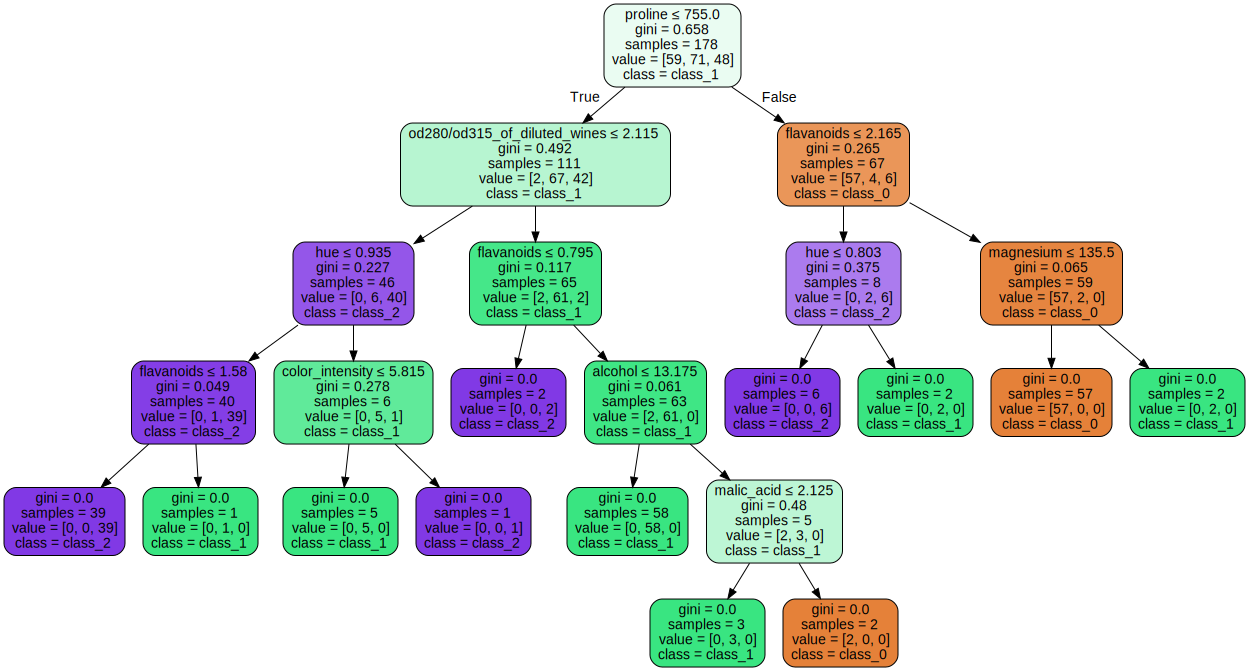

In [72]:
###################### print decision tree visualization
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("wine") 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=wine.feature_names,  
                         class_names=wine.target_names,  
                         filled=True, rounded=True,
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [73]:
#################### set criterion to entropy
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(wine.data, wine.target)

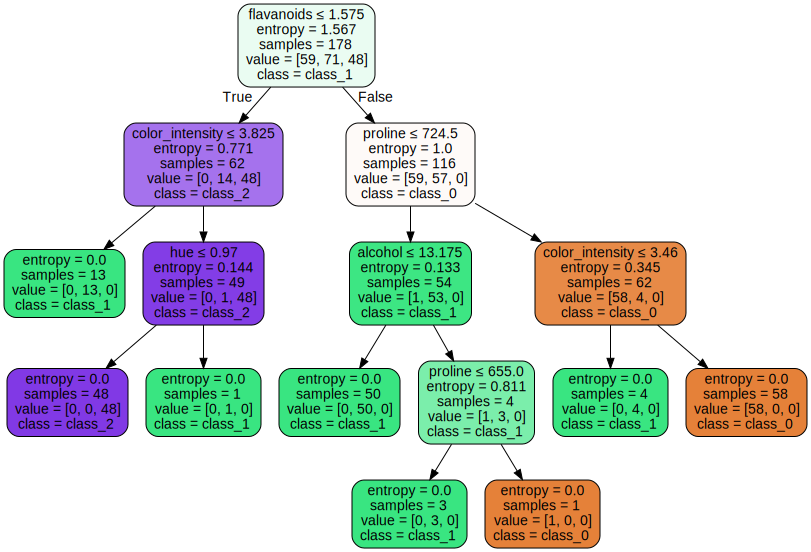

In [74]:
###################### print decision tree visualization
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("wine") 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=wine.feature_names,  
                         class_names=wine.target_names,  
                         filled=True, rounded=True,
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 